In [21]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Lecture 4 - Regression
---

### Content

1. Intro to regression
2. Assessing the goodness of fit

### Learning Outcomes

At the end of this lecture, you should be able to:

* describe the purpose of linear regression
* perform introductory regression model fitting using python libraries
* explain the degree of fit of a linear regression model


---

---

## Linear Regression - An Introduction

Often in real world applications we need to understand how the value of one variable is affected or determined by one or several other variables. 

This not only helps us to **understand and explain** the relationships of existing data and get a grasp of the situation, but it also enables us to make **predictions on future data**.

We may for example want to know:

* How does sales volume change with changes in price. How is this affected by changes in the weather?

* How does the amount of a drug absorbed vary with dosage and with body weight of patient?  Does it depend on blood pressure?

* How are the conversions on an e-commerce website affected by two different page titles in an A/B comparison? 

* How does the energy released by an earthquake vary with the depth of it's epicenter?

* How is the interest rate charged on a loan affected by credit history and by loan amount?

* What exam mark is a student likely to achieve given their previous assignment marks?

If we can find a **pattern** that accurately describes the relationship between these variables, then we can predict the latter, given the former. Eg. Given a persons credit rating (x1) and the requested loan amount (x2), what will the likely interest rate (y) be?

Answering the above questions, requires us to create a **model** which describes the pattern in the data.  

A model is a mathematical formula where one variable (response, usually $y$) varies depending on one or more independent variables (covariates, usually $x_i$). For example, the total number of Facebook friends a person has ($y$) might be related to the number of hours $x$ a person spends on Facebook a day.

One of the common and simplest models we can create is a **Linear Model**. With a linear model we make a big assumption that one response variable changes linearly with the changes in one or two other variables. 


While this is a big and simplistic assumption, it turns out that many real world problems can be modeled usefully in this way and the model thus works quite well.  Often data that don't appear to have a linear relationship can be transformed using simple mappings so that they do show a linear relationship.  This is very powerful and accordingly Linear Models have wide applicability. 

Note that linear modeling involves numerical and not categorical outcomes. Creating a Linear Model involves a technique known as **Linear Regression**. Given numerical problems, experimenting initially with linear regression is a wise choice before moving to other methods at subsequent attempts to find better fits to the problem if needed.

Linear Regression is one of the foundational tools of Data Science. It is the first **machine learning algorithm** we will look at from the perspective of how to use it and interpret it, rather than from the mathematical perspective.

---


In [22]:
!pip install patsy==0.4.1

In [23]:
import patsy

In [24]:
#ensure it is version '0.4.1'
patsy.__version__

'0.4.1'

In [25]:
!pip install seaborn tushare  -i http://pypi.douban.com/simple --trusted-host pypi.douban.com

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

%matplotlib inline

In [27]:
pd.options.display.max_columns = 50

In [28]:
from pylab import rcParams

sns.set(style="ticks")
#sns.set_style("whitegrid")
rcParams['figure.dpi'] = 350
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'
rcParams['figure.figsize'] = 10,8
rcParams['font.size'] = 20

In [29]:
rcParams['axes.labelsize'] = 'large'
rcParams['xtick.labelsize'] = 20
rcParams['ytick.labelsize'] = 20

(0, 10)

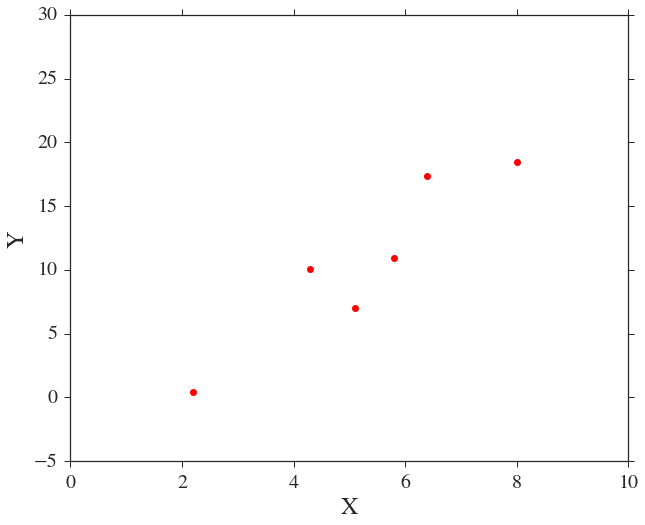

In [30]:
x = [2.2, 4.3, 5.1, 5.8, 6.4, 8.0]
y = [0.4, 10.1, 7.0, 10.9, 17.4, 18.5]
x = np.array(x)
y = np.array(y)
plt.plot(x,y,'ro')
plt.xlabel("X")
plt.ylabel("Y")
plt.ylim([-5,30])
plt.xlim([0,10])

We can build a model to characterize the relationship between $X$ and $Y$, recognizing that additional factors other than $X$ (the ones we have measured or are interested in) may influence the response variable $Y$.

Our task is to find the optimal values for the $y$ intercept $\beta_0$ and the coefficient for $x$ values $\beta_1$:


<div style="font-size: 150%;">  
$y_i = \beta_0 + \beta_1 x_i + \epsilon_i$
</div>

where $\epsilon_i$ represents our expected error so that our predicted $y_i$ for a given $x_i$ will be in the vicinity of $y_i \pm \epsilon_i$.

The approximate equation for the line in this example is roughly $y = -4.35 + 3.0 \times x $. We will say this is our initial **model**. 

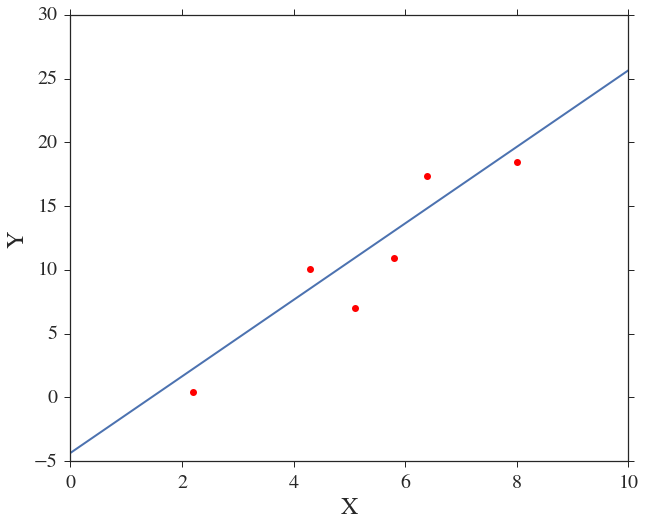

In [31]:
b0, b1 = (-4.35, 3.0)
plt.plot(x, y, 'ro')
plt.plot([0,10], [b0, b0+b1*10])
plt.xlabel("X")
plt.ylabel("Y")

## Model Assumptions:

Each model/classification algorithm comes with some assumptions regarding the data it is applied to, and it is important to be aware of these since they directly affect the efficacy of the generated model accuracy. Generating regression models using the least squares approach comes with the following three assumptions about the underlying data:

1. The relationship between the two variables should be **linear**.
2. The variance around the regression line is the same for all values of X - this is called **homoscedasticity**.
3. The **residuals** or the **errors of prediction are distributed normally** around the regression line.

If we believe that our data does not (strongly) violate the above assumptions, we can proceed with generating a linear regression model. There are a number of different libraries in Python which allow us to do this. 

## Measuring the Goodness-of-fit

Once the model has been generated, the questions should then be raised: 

1. How well does the model fit the data?
2. How accurate and reliable is this model likely to be when predicting new data? 

In order to be able to give and a robust evaluation, we need to define a few terms which will allow us to quantify the above.



Below is the the formula that gives us the predicted values for $y$ given $x$.

<div style="font-size: 150%;">  
$\hat{y} = \beta_0 + \beta_1 x$
</div>

[2.2000000000000002, 2.2000000000000002] [0.40000000000000002, 2.2500000000000009]
[4.2999999999999998, 4.2999999999999998] [10.1, 8.5499999999999989]
[5.0999999999999996, 5.0999999999999996] [7.0, 10.949999999999999]
[5.7999999999999998, 5.7999999999999998] [10.9, 13.049999999999999]
[6.4000000000000004, 6.4000000000000004] [17.399999999999999, 14.850000000000003]
[8.0, 8.0] [18.5, 19.649999999999999]


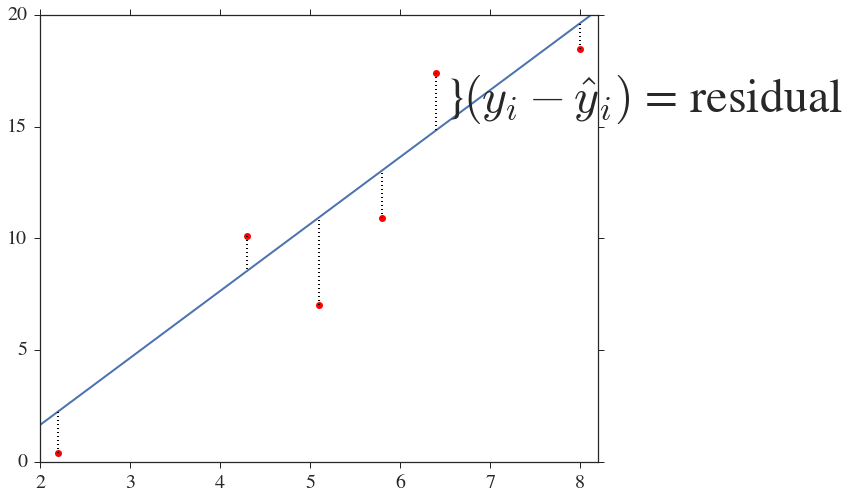

In [32]:
plt.plot(x, y, 'ro')
plt.plot([0,10], [b0, b0+b1*10])
for xi, yi in zip(x,y):
    print [xi]*2, [yi, b0+b1*xi]
    plt.plot([xi]*2, [yi, b0+b1*xi], 'k:')
plt.xlim(2, 8.2); plt.ylim(0, 20)

plt.text(6.5, 15.7, r'}',    fontsize=48)
plt.text(6.7, 15.7, r'$(y_i - \hat{y}_i)$ = residual',    fontsize=48)

The difference between the true value of $y_i$ and the predicted value of $\hat{y}_i$ is the error of the regression line and is called the **residual**. The least squares procedure for fitting a regression line, optimizes the line so that the sum of squared residuals is minimized.

10.7166666667
[2.2000000000000002, 2.2000000000000002] [0.40000000000000002, 2.2500000000000009]
[4.2999999999999998, 4.2999999999999998] [10.1, 8.5499999999999989]
[5.0999999999999996, 5.0999999999999996] [7.0, 10.949999999999999]
[5.7999999999999998, 5.7999999999999998] [10.9, 13.049999999999999]
[6.4000000000000004, 6.4000000000000004] [17.399999999999999, 14.850000000000003]
[8.0, 8.0] [18.5, 19.649999999999999]


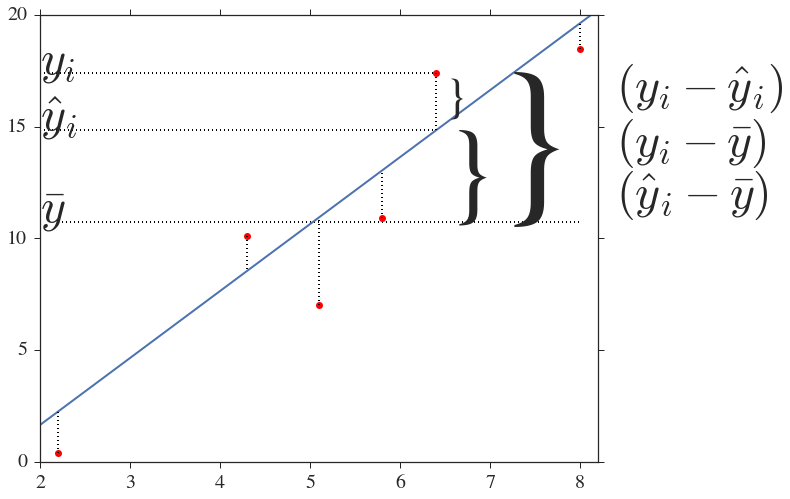

In [33]:
print np.mean(y)
plt.plot( x, [np.mean(y)]*len(x),'k:')
plt.text(2, np.mean(y), r'$\bar{y}$',    fontsize=48)

plt.plot([2,6.4], [14.85, b0+b1*6.4], 'k:')
plt.text(2, b0+b1*6.4, r'$\hat{y}_i$',    fontsize=48)

plt.plot([2,6.4], [17.4]*2, 'k:')
plt.text(2, 17.4, r'$y_i$',    fontsize=48)

plt.plot(x, y, 'ro')
plt.plot([0,10], [b0, b0+b1*10])
for xi, yi in zip(x,y):
    print [xi]*2, [yi, b0+b1*xi]
    plt.plot([xi]*2, [yi, b0+b1*xi], 'k:')
plt.xlim(2, 8.2); plt.ylim(0, 20)

plt.text(6.5, 15.7, r'}',    fontsize=48)
plt.text(8.4, 16.2, r'$(y_i - \hat{y}_i)$',    fontsize=48)

plt.text(6.5, 11.5, r'}',    fontsize=110)
plt.text(8.4, 13.7, r'$(y_i - \bar{y})$',    fontsize=48)

plt.text(7, 12.0, r'}',    fontsize=180)
plt.text(8.4, 11.4, r'$(\hat{y}_i - \bar{y})$',    fontsize=48)

The above graph allows us to visually see how the total variation in $y$ can be explained by $x$, given the generated linear regression model. 


<div style="font-size: 120%;">  
$$ (y_i - \bar{y}) = (\hat{y}_i - \bar{y}) + (y_i - \hat{y}_i) $$
</div>

The above quantities are squared and summed for each value of observations. Squaring serves two purposes: (1) to prevent positive and negative values from canceling each other out and (2) to strongly penalize large deviations. Whether the latter is a good thing or not depends on the goals of the analysis. This give us the following:

<div style="font-size: 120%;">  
$$ SS_{Total} = \sum_{i=1}^N(y_i - \bar{y})^2  $$
</div>

<div style="font-size: 120%;">  
$$ SS_{Regression} = \sum_{i=1}^N(\hat{y}_i - \bar{y})^2  $$
</div>

<div style="font-size: 120%;">  
$$ SS_{Residual} = \sum_{i=1}^N(y_i - \hat{y}_i)^2  $$
</div>

The total proportion of all the variation in $y$, explained by $x$ can therefore be defined as:

<div style="font-size: 120%;">  
$$R^2 = \frac{SS_{Regression}}{SS_{Total}} $$  
</div>

often called the **coefficient of determination** and used as the primary criterion for summarizing how well a linear regression model fits the data.

If the predictions ($\hat{y}$) are close to the actual values ($y$), we would expect $R^2$ to be close to 1. On the other hand, if the predictions are unrelated to the actual values, then $R^2 = 0$ . In all cases, $R^2$ lies between 0 and 1.

The $R^2$ value is commonly used, often incorrectly, in forecasting. There are no set rules of what a good $R^2$ value is and typical values of $R^2$ depend on the type of data used. Sometimes a regression line will still be useful and yield statistically significant results even when $R^2$ is low. This means even when R-squared is low, low P values still indicate a real relationship between the significant predictors and the response variable. However, the low $R^2$ models will be less useful for precise predictions.

Validating a model’s out-of-sample (test set) forecasting performance  is much better than measuring the in-sample (training set) $R^2$ value.



### Root Mean Squared Error###

Another way to express how far typical points or observations are, on average, from your regression line is through the Root Mean Squared Error (RMSE) or root-mean-square deviation (RMSD). 

Essentially, the RMSE is the standard deviation of the residuals or the measure of the spread of the residuals around the regression line on the vertical axis. Since the RMS error is measured on the same scale with the same units as $y$, the RMSE can be interpreted in the same manner as the standard deviation. This means that 68% of the residuals can be expected to fall within $1 \pm$RMSE, meanwhile 95% can be expected to fall within $2 \pm$RMSE.

RMSE can be quantified as:

<div style="font-size: 120%;">  
   $$ \operatorname{RMSE}=\sqrt{\frac{\sum_{i=1}^n (y - \hat y_i)^2}{N}} $$
</div>

A shortcut for calculating the RMSE if you have the $R^2$ is as follows:
<div style="font-size: 120%;">  
$$ RMSE = \sigma_y \times \sqrt{1 - R^2}   $$
</div>

where $\sigma_y$ is the standard deviation of the quantity you are trying to predict and $R^2$ is the correlation coefficient. 

## Example

Given a set of student grades in assignments/course work, is it possible to predict the score they will achieve in the exam?

The example below is based on an anonymized dataset from a class. The values have been permuted with noise and thus no single observation represents a real student's assignment/exam grade. However, while the permutation and the introduction of noise has weakened the real relationships to some degree, the trends have nonetheless been preserved and are effective for analysis.

A# refer to assignment numbers, CW is the total course work (sum of assignment scores) and the exam represents the numeric score achieved.

In [34]:
#regression library
import statsmodels.formula.api as smf

grades = pd.read_csv("grades_prediction_mode.csv", index_col=0)
grades.head()

,A1,A2,A3,A4,A5,CW,Exam,Total,Grade,Mode
0,3.5,5.50,7.5,6.5,7.5,30.50,30.0,60.50,B-,INT
1,2.5,4.50,3.2,3.8,NaN,14.00,10.0,24.00,E,INT
2,4.0,5.25,7.1,10.2,11.5,38.05,31.0,69.05,B,INT
3,4.0,NaN,3.0,7.7,9.5,24.20,23.0,47.20,R,INT
4,4.5,4.75,7.4,10.3,8.8,35.75,40.0,75.75,B+,EXT


Let's first take a look at the means for each of the course assessments divided by the final grade in order to see if there are some patterns:

**Exercise:** Use pivot tables to generate a table which summarizes all the medians, min and max values for all the assessments based on the final student grade. Can we tell if there are any obvious trends?

In [35]:
grades.pivot_table(values=['Exam','CW','A1',"A2",'A3','A4','A5'], index=['Grade'], aggfunc=[np.median, np.max, np.min])

median                                            amax              \
          A1     A2    A3      A4      A5      CW  Exam   A1    A2    A3   
Grade                                                                      
A      4.500  5.500  7.40  10.300  11.400  38.700  48.0  4.5  5.50  7.50   
A+     4.500  5.250  7.50  10.500  11.500  38.900  52.0  4.5  5.50  7.50   
A-     4.500  5.000  7.00  10.250  11.200  36.850  46.0  4.5  5.50  7.50   
B      4.500  5.250  6.70  10.100  10.500  35.000  37.0  4.5  5.50  7.50   
B+     4.500  5.000  7.20   8.725  10.900  34.980  43.0  4.5  5.50  7.50   
B-     4.000  4.750  6.40   7.200   8.950  29.800  33.0  4.5  5.50  7.50   
C      4.000  4.750  4.10   7.250   8.100  21.750  27.0  4.5  5.50  5.50   
C+     3.625  4.250  4.25   7.250   7.625  24.725  31.5  4.5  5.40  6.10   
D      3.625  4.500  3.15   5.750   5.500  16.100  22.0  4.5  5.00  4.25   
DNC    3.525  4.250  4.80   6.100   2.600  11.000   NaN  4.5  5.50  7.00   
E      3.500  4.375  2.80   3.800   6.500  10.550  11.0  4.0  4.75  4.50   
R      4.000  4.250  3.30   7.525   8.500  23.225  23.5  4.5  5.50  6.70   

                                amin                                        
         A4    A5     CW  Exam    A1    A2   A3    A4    A5     CW    Exam  
Grade                                                                       
A      10.5  11.5  39.50  52.0  4.00  4.25  7.0  8.80   9.5  35.05  46.000  
A+     10.5  11.5  39.50  57.0  4.50  5.00  7.2  8.90  10.1  37.50  50.000  
A-     10.5  11.5  39.30  51.0  0.50  4.75  4.9  9.20   9.3  32.90  43.000  
B      10.5  11.5  39.30  45.0  3.00  3.00  3.0  6.25   5.6  25.95  28.000  
B+     10.5  11.5  39.10  49.0  3.25  3.85  4.0  7.75   7.9  31.65  40.000  
B-      9.7  11.5  38.45  43.0  3.00  4.25  2.5  4.25   6.3  20.45  23.000  
C       8.4  11.5  32.05  34.0  3.50  3.60  2.9  3.80   5.4  16.80  21.000  
C+      8.5   9.3  31.05  42.0  2.75  3.05  2.5  4.25   5.0  12.80  26.000  
D       7.3   9.5  20.50  32.0  3.10  0.70  1.9  2.50   2.5   3.10  12.000  
DNC     9.8   3.0  26.40   NaN  0.50  2.60  0.7  1.50   2.2   3.30     NaN  
E       4.0   6.5  14.00  16.0  0.25  1.25  0.0  1.80   6.5   3.50   1.001  
R       8.5  11.5  35.00  30.0  3.40  2.25  1.9  4.30   2.7  15.30  13.000

If we wanted to drill deeper and see if there were any differences of note between the performances of internal and extramural students, we could do so using pivots.

**Exercise:** Use pivot tables to generate the same pivots as above, except, add Mode as an additional index: if there are any obvious trends?

In [36]:
grades.pivot_table(values=['Exam','CW','A1',"A2",'A3','A4','A5'], index=['Mode','Grade'], aggfunc=[np.median, np.max, np.min])

median                                           amax              \
               A1     A2    A3      A4     A5      CW  Exam   A1    A2    A3   
Mode Grade                                                                     
EXT  A      4.500  5.500  7.40  10.100  11.50  38.700  48.0  4.5  5.50  7.50   
     A+     4.500  5.250  7.45  10.500  11.50  38.850  52.5  4.5  5.50  7.50   
     A-     4.500  5.000  7.20  10.200  11.50  37.900  45.0  4.5  5.50  7.50   
     B      4.500  5.250  7.00  10.100   9.50  36.250  38.0  4.5  5.50  7.50   
     B+     4.500  4.750  7.40  10.000  10.80  36.300  43.0  4.5  5.50  7.50   
     B-     4.500  4.750  6.90   6.800   6.75  28.000  33.0  4.5  5.00  7.40   
     C      4.250  4.875  3.10   4.100   6.15  22.475  28.0  4.5  5.00  3.30   
     C+     4.000  5.000  3.55   4.800   5.90  17.900  37.5  4.5  5.00  3.80   
     D      4.000  2.250  3.25   7.300   2.50  11.800  22.0  4.4  5.00  3.70   
     DNC    3.525  4.250  4.80   6.100   2.60  11.000   NaN  4.5  5.50  7.00   
     E      4.000  3.500  3.45   1.800   6.50  12.000   9.0  4.0  4.50  4.50   
     R      4.000  4.250  3.10   4.400   2.70  16.550  29.0  4.0  5.00  4.00   
INT  A      4.250  5.500  7.45  10.450  10.45  38.100  47.0  4.5  5.50  7.50   
     A+     4.500  5.500  7.50  10.500  11.50  39.500  50.0  4.5  5.50  7.50   
     A-     4.000  5.500  5.10  10.300  11.00  36.100  46.0  4.5  5.50  7.50   
     B      4.250  5.000  6.45   9.750  10.50  34.800  37.0  4.5  5.50  7.50   
     B+     4.500  5.000  6.80   8.500  11.00  34.450  43.0  4.5  5.50  7.50   
     B-     4.000  4.875  4.95   8.150   9.50  30.600  32.5  4.5  5.50  7.50   
     C      4.000  4.625  5.00   7.475   9.90  21.750  27.0  4.5  5.50  5.50   
     C+     3.625  4.250  4.30   7.500   8.00  26.500  29.5  4.5  5.40  6.10   
     D      3.500  4.750  3.15   4.625   6.00  17.450  19.0  4.5  5.00  4.25   
     DNC      NaN    NaN   NaN     NaN    NaN     NaN   NaN  NaN   NaN   NaN   
     E      3.000  4.500  1.60   3.900    NaN   9.550  11.5  3.8  4.75  3.20   
     R      4.000  4.625  3.50   7.700   9.00  25.800  21.0  4.5  5.50  6.70   

                                     amin                                   \
              A4    A5     CW  Exam    A1    A2    A3     A4     A5     CW   
Mode Grade                                                                   
EXT  A      10.5  11.5  39.50  52.0  4.00  4.25  7.00   8.80  10.10  35.05   
     A+     10.5  11.5  39.50  57.0  4.50  5.00  7.20   8.90  10.10  37.50   
     A-     10.4  11.5  39.30  46.0  4.50  4.75  6.70   9.80   9.30  35.90   
     B      10.5  11.3  39.20  45.0  3.00  4.75  6.70   6.25   5.60  27.00   
     B+     10.5  11.3  39.10  46.0  4.00  4.50  6.70   8.30   7.90  32.25   
     B-      8.3  10.5  34.10  43.0  3.00  4.25  3.90   4.40   6.30  20.45   
     C       4.4   6.9  23.50  29.0  4.00  4.75  2.90   3.80   5.40  21.45   
     C+      4.8   5.9  23.00  42.0  3.50  5.00  3.30   4.80   5.90  12.80   
     D       7.3   2.5  17.45  25.0  3.25  0.70  2.80   7.30   2.50   6.65   
     DNC     9.8   3.0  26.40   NaN  0.50  2.60  0.70   1.50   2.20   3.30   
     E       1.8   6.5  12.20  12.0  0.25  1.25  2.40   1.80   6.50   8.50   
     R       6.6   2.7  20.65  30.0  4.00  4.25  1.90   4.30   2.70  15.30   
INT  A      10.5  11.4  39.30  48.0  4.00  5.50  7.40  10.40   9.50  36.90   
     A+     10.5  11.5  39.50  50.0  4.50  5.50  7.50  10.50  11.50  39.50   
     A-     10.5  11.0  36.20  51.0  0.50  5.00  4.90   9.20  10.70  32.90   
     B      10.5  11.5  39.30  43.0  3.75  3.00  3.00   7.10   6.75  25.95   
     B+     10.2  11.5  37.30  49.0  3.25  3.85  4.00   7.75   8.50  31.65   
     B-      9.7  11.5  38.45  37.0  3.25  4.25  2.50   4.25   7.50  25.85   
     C       8.4  11.5  32.05  34.0  3.50  3.60  3.30   6.90   5.60  16.80   
     C+      8.5   9.3  31.05  41.0  2.75  3.05  2.50   4.25   5.00  14.65   
     D       5.9   9.5  20.50  32.0  3.10  3.50  1.90   

Let's turn to a graphical representation of this data cloud and visually examine if there are strong relationships between the different features in this dataset.

**Exercise:** Generate a graph that visualises the pair-wise relationships between all the features in the dataset. Are there correlations? Which ones are weak/strong? Why?

In [37]:
pd.tools.plotting.scatter_matrix(grades, alpha=1, figsize(20, 15))

SyntaxError: non-keyword arg after keyword arg (<ipython-input-37-d63b9901f29e>, line 1)

We can also calculate numerically the strengths of the correlations from the above in a matrix format:

In [38]:
grades.corr()

,A1,A2,A3,A4,A5,CW,Exam,Total
A1,1.000000,0.464685,0.382809,0.458047,0.389768,0.497669,0.329278,0.463103
A2,0.464685,1.000000,0.435899,0.402199,0.436249,0.531480,0.419396,0.493696
A3,0.382809,0.435899,1.000000,0.673946,0.404791,0.760577,0.623255,0.706977
A4,0.458047,0.402199,0.673946,1.000000,0.678972,0.856847,0.596316,0.756806
A5,0.389768,0.436249,0.404791,0.678972,1.000000,0.821625,0.418337,0.697616
CW,0.497669,0.531480,0.760577,0.856847,0.821625,1.000000,0.664341,0.893246
Exam,0.329278,0.419396,0.623255,0.596316,0.418337,0.664341,1.000000,0.930145
Total,0.463103,0.493696,0.706977,0.756806,0.697616,0.893246,0.930145,1.000000


Now that we see that there are relationships in the data and in particular between the CW as a predictor and Exam as a response variable, we can generate a regression model, visualise it, and evaluate its reliability as follows:

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Exam   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     43.56
Date:                Wed, 10 Aug 2016   Prob (F-statistic):           2.88e-09
Time:                        16:35:27   Log-Likelihood:                -318.60
No. Observations:                  91   AIC:                             641.2
Df Residuals:                      89   BIC:                             646.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      4.3357      5.127      0.846      0.400        -5.851    14.523
CW             1.0090      0.153      6.600      0.000         0.705     1.313
==============================================================================
Omnibus:                        7.811   Durbin-Watson:                   1.489
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.449
Skew:                          -0.680   Prob(JB):                       0.0241
Kurtosis:                       3.342   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

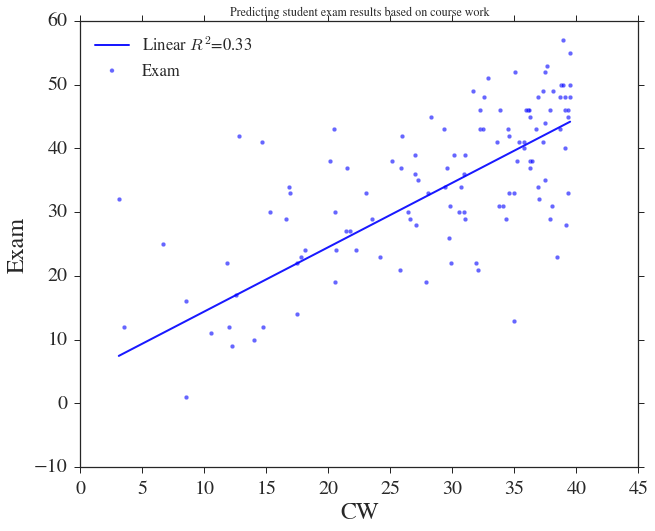

In [39]:
#generate the x-axis values that are in range for the CW values
x = pd.DataFrame({'CW': np.linspace(grades.CW.min(), grades.CW.max(), len(grades.CW))})

#generate the model which uses the course work score to predict the exan mark - the ols() return the generated model
mod = smf.ols(formula='Exam ~ 1 + CW', data=grades.dropna()).fit()

#plot the actual data
plt.scatter(grades.CW, grades.Exam, s=20, alpha=0.6)
plt.xlabel('CW'); plt.ylabel('Exam')

#render the regression line by predicting the ys using the generated model from above
plt.plot(x.CW, mod.predict(x), 'b-', label='Linear $R^2$=%.2f' % mod.rsquared, alpha=0.9)

#give the figure a meaningful legend
plt.legend(loc='upper left', framealpha=0.5, prop={'size':'small'})
plt.title("Predicting student exam results based on course work")

#display the model statistics describing the goodness of fit
mod.summary()

**Exercise:** Describe what you see in the regression output and the model fit? How good of a fit is the model? Is the relationship between the variables significant? Is the model likely to be accurate for predictions?

Given the above regression model that we have generated, we can now make predictions about individual observations for whom we do not know what the true dependent variable value is.

Here is an example of a student who achieved 25/40 from the class course work, and we are going to predict what he would have achieved in his exam, given the above model:

In [40]:
#first create a series object with the value to predict
student_course_work = pd.Series(data={'CW':25})
student_course_work

CW    25
dtype: int64

In [41]:
mod.predict(student_course_work)

array([ 29.56116849])

**Exercise:** Let's assume that you are now interested in finding out how well you can predict a student's overall total mark for a paper, based on their exam result. Write code that does this and consider the interpretation of your findings.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     721.8
Date:                Wed, 10 Aug 2016   Prob (F-statistic):           1.79e-44
Time:                        16:35:28   Log-Likelihood:                -267.14
No. Observations:                  91   AIC:                             538.3
Df Residuals:                      89   BIC:                             543.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     20.7912      1.922     10.817      0.000        16.972    24.610
Exam           1.3257      0.049     26.866      0.000         1.228     1.424
==============================================================================
Omnibus:                        2.126   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.345   Jarque-Bera (JB):                1.761
Skew:                          -0.339   Prob(JB):                        0.415
Kurtosis:                       3.061   Cond. No.                         155.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

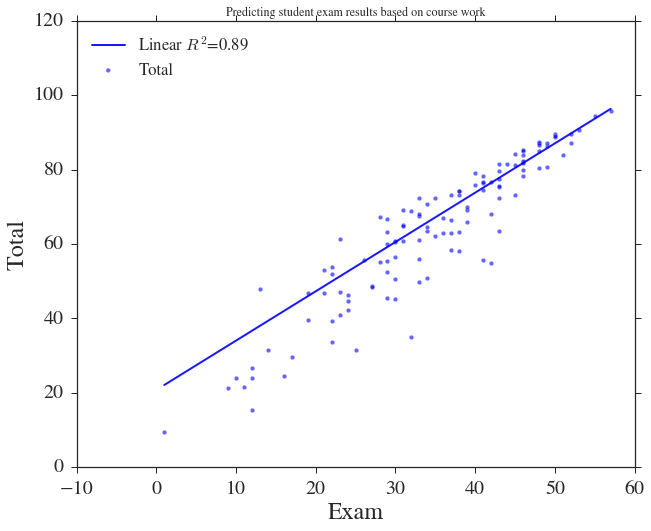

In [42]:

#generate the model which uses the course work score to predict the exan mark - the ols() return the generated model

#plot the actual data

#render the regression line by predicting the ys using the generated model from above

#display the model statistics describing the goodness of fit

#generate the x-axis values that are in range for the CW values
x = pd.DataFrame({'Exam': np.linspace(grades.Exam.min(), grades.Exam.max(), len(grades.Exam))})

#generate the model which uses the course work score to predict the exan mark - the ols() return the generated model
mod = smf.ols(formula='Total ~ 1 + Exam', data=grades.dropna()).fit()

#plot the actual data
plt.scatter(grades.Exam, grades.Total, s=20, alpha=0.6)
plt.xlabel('Exam'); plt.ylabel('Total')

#render the regression line by predicting the ys using the generated model from above
plt.plot(x.Exam, mod.predict(x), 'b-', label='Linear $R^2$=%.2f' % mod.rsquared, alpha=0.9)

#give the figure a meaningful legend
plt.legend(loc='upper left', framealpha=0.5, prop={'size':'small'})
plt.title("Predicting student exam results based on course work")

#display the model statistics describing the goodness of fit
mod.summary()


**Exercise:** Using the above model you generated, predict the total score students with the following exam marks [15, 40, 55] are likely to get.

In [43]:
student_course_work = pd.Series(data={'CW':25})
student_course_work

CW    25
dtype: int64

## Regression Line Confidence Intervals

The **regression line is an estimation** of where the true model parameters should lie. 

Sometimes we would like to know what is the the **region in which the true model parameters lie given a certain confidence value**. For this we can define a confidence interval.

The confidence interval lets us define a window in which the true regression line is likely to be situated for example with a 95% confidence. Another way of thinking about this is that our result (whatever it is), can be estimated with a 95% chance of lying in this range.

For linear regression we can visually display a confidence interval in which we expect the true value to lie. 

Below is an example of a function defined by James Bagrow (http://nbviewer.ipython.org/url/bagrow.com/dsv/LEC10_notes_2014-02-13.ipynb) on how to calculate a specified confidence interval using Student's t Distribution:



In [44]:
import scipy

def linregress_CIs(xd,yd,conf=0.95):
    """Linear regression CIs FTW!"""
    alpha=1.-conf   # significance
    n = xd.size   # data sample size
    x = np.linspace(xd.min(),xd.max(),1000)
        
    # Predicted values from fitted model:
    a, b, r, p, err = scipy.stats.linregress(xd,yd)
    y = a*x+b
    
    sd = 1./(n-2.)*np.sum((yd-a*xd-b)**2)
    sd = np.sqrt(sd)
    sxd = np.sum((xd-xd.mean())**2)
    sx  = (x-xd.mean())**2
    
    # quantile of student's t distribution for p=1-alpha/2
    q = scipy.stats.t.ppf(1.-alpha/2, n-2)
    
    # get the upper and lower CI:
    dy = q*sd*np.sqrt( 1./n + sx/sxd )
    yl = y-dy
    yu = y+dy
    
    return yl,yu,x

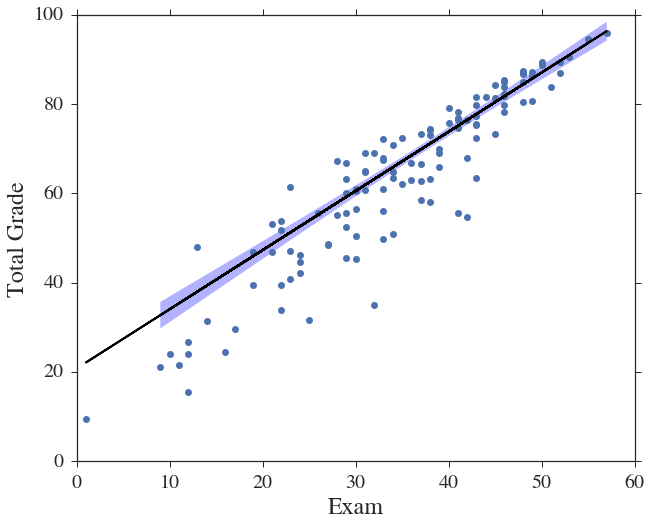

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     721.8
Date:                Wed, 10 Aug 2016   Prob (F-statistic):           1.79e-44
Time:                        16:35:30   Log-Likelihood:                -267.14
No. Observations:                  91   AIC:                             538.3
Df Residuals:                      89   BIC:                             543.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     20.7912      1.922     10.817      0.000        16.972    24.610
Exam           1.3257      0.049     26.866      0.000         1.228     1.424
==============================================================================
Omnibus:                        2.126   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.345   Jarque-Bera (JB):                1.761
Skew:                          -0.339   Prob(JB):                        0.415
Kurtosis:                       3.061   Cond. No.                         155.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
grades_no_NAN = grades.dropna()
yl,yu,xd = linregress_CIs(grades_no_NAN.Exam.as_matrix(),grades_no_NAN.Total.as_matrix(), .95)
mod = smf.ols(formula='Total ~ 1 + Exam', data=grades.dropna()).fit()

plt.xlabel('Exam')
plt.ylabel('Total Grade')
plt.plot(grades.Exam,grades.Total, 'o')
plt.plot(grades.Exam, mod.params[1]*grades.Exam+mod.params[0],'k-')
plt.fill_between(xd, yl, yu, alpha=0.3, facecolor='blue',edgecolor='none')
plt.show()
mod.summary()

The blue area is a 95% confidence interval on the line. **It does not mean that 95% of the data points fall inside the blue area**.

The  confidence bands are curved. This also does not mean that the confidence band includes the possibility of curves as well as straight lines. Rather, the curved lines are the boundaries of all possible straight lines that could be fit within this confidence interval.

Given the assumptions of linear regression, **you can be 95% confident that the two curved confidence bands enclose the true best-fit linear regression line**, leaving a 5% chance that the true line is outside those boundaries.

Many data points will be outside the 95% confidence bands. The confidence bands are 95% sure to contain the best-fit regression line. This is not the same as saying it will contain 95% of the data points.


**Exercise:** Generate a scatter plot matrix for the above student grade problem. Select a different combination of variables and build a regression model together with the confidence intervals using the function provided.

## Regression Line Prediction Bands

The **prediction bands identify the region that specifies where a given percentage of points should fall**. 

The **prediction band** deals specifically with where the **predictions** should fall, while the **confidence intervals** define where the true **regression line** should fall. 

Use prediction bands when your intent is to depict the variation in your data. Meanwhile, use confidence intervals to visually analyze how precisely your data define the best-fit line.


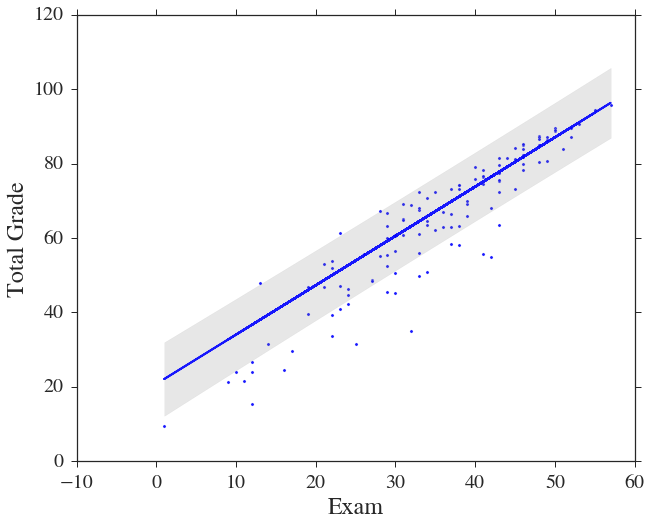

In [46]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

#generate the model
mod = smf.ols(formula='Total ~ 1 + Exam', data=grades.dropna()).fit()

#extract the parameters for the confidence window
x_pred = np.linspace(grades.Exam.min(), grades.Exam.max(), len(grades.Exam))
x_pred2 = sm.add_constant(x_pred)

#confidence = 95% (alpha=0.05)
sdev, lower, upper = wls_prediction_std(mod, exog=x_pred2, alpha=0.05)

#plot points and confidence window
plt.scatter(grades.Exam, grades.Total, s=10, alpha=0.9)
plt.fill_between(x_pred, lower, upper, color='#888888', alpha=0.2)

#plot the regression line
plt.plot(grades.Exam.dropna(), mod.predict(grades[['Exam']] ), 'b-', label='Linear n=1 $R^2$=%.2f' % mod.rsquared, alpha=0.9)

plt.xlabel('Exam')
plt.ylabel('Total Grade')

**Exercise:**: Draw 99% prediction bands for the prediction model you generated in the previous exercise.
        

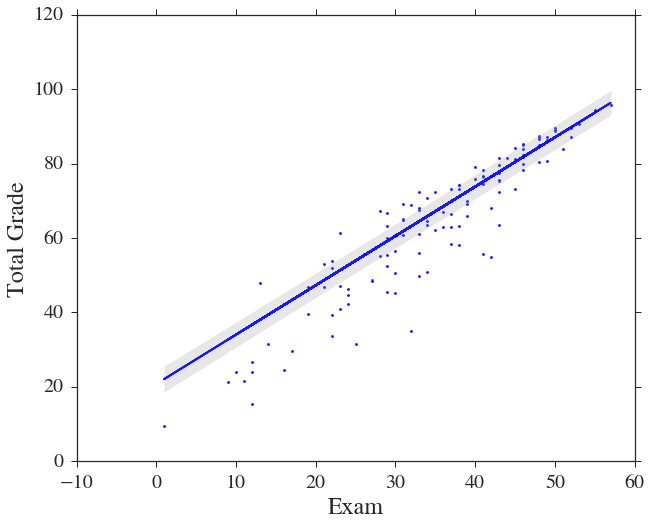

In [47]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

#generate the model
mod = smf.ols(formula='Total ~ 1 + Exam', data=grades.dropna()).fit()

#extract the parameters for the confidence window
x_pred = np.linspace(grades.Exam.min(), grades.Exam.max(), len(grades.Exam))
x_pred2 = sm.add_constant(x_pred)

#confidence = 95% (alpha=0.05)
sdev, lower, upper = wls_prediction_std(mod, exog=x_pred2, alpha=0.5)

#plot points and confidence window
plt.scatter(grades.Exam, grades.Total, s=10, alpha=0.9)
plt.fill_between(x_pred, lower, upper, color='#888888', alpha=0.2)

#plot the regression line
plt.plot(grades.Exam.dropna(), mod.predict(grades[['Exam']] ), 'b-', label='Linear n=1 $R^2$=%.2f' % mod.rsquared, alpha=0.9)

plt.xlabel('Exam')
plt.ylabel('Total Grade')

**Exercise:**: Calculate the RMSE for the above model and plot a figure that displays the spread of the residuals at one standard deviation from the regression line (covering some 68% of the predictions).

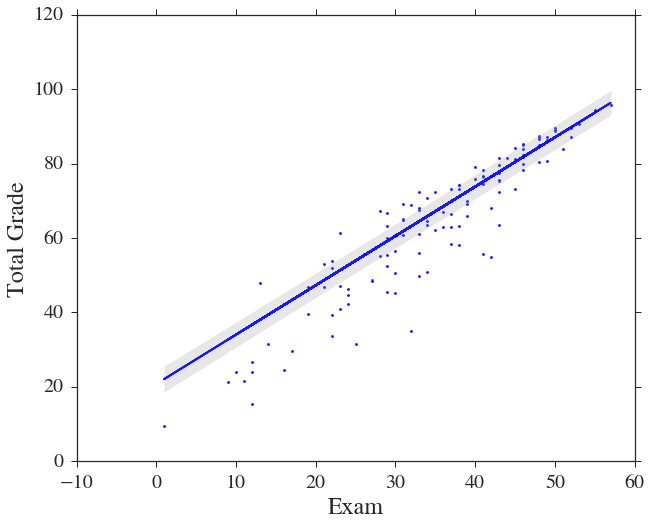

In [48]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

#generate the model
mod = smf.ols(formula='Total ~ 1 + Exam', data=grades.dropna()).fit()

#extract the parameters for the confidence window
x_pred = np.linspace(grades.Exam.min(), grades.Exam.max(), len(grades.Exam))
x_pred2 = sm.add_constant(x_pred)

#confidence = 95% (alpha=0.05)
sdev, lower, upper = wls_prediction_std(mod, exog=x_pred2, alpha=0.5)

#plot points and confidence window
plt.scatter(grades.Exam, grades.Total, s=10, alpha=0.9)
plt.fill_between(x_pred, lower, upper, color='#888888', alpha=0.2)

#plot the regression line
plt.plot(grades.Exam.dropna(), mod.predict(grades[['Exam']] ), 'b-', label='Linear n=1 $R^2$=%.2f' % mod.rsquared, alpha=0.9)

plt.xlabel('Exam')
plt.ylabel('Total Grade')

Sometimes it is useful to visualise the residuals in respect to the response variable, in oder to inspect the normality of their distribution and unusual shapes which might be indicative of non-normality.

**Exercise:**: Use a scatter plot to visualise the distribution of the residuals.

## Be Careful with Predictions

We have to be very careful to understand the difference between **extrapolation** and **interpolation**. The two are subtly different. Interpolation is concerned with predicting points within your range of data, which is what regression is designed to do.

Extrapolation is about making predictions that are outside the range of the data that your algorithm has been trained on. You must be very cautious of extrapolation. People extrapolate all the time. But if you're going to do it, you need to specify additional assumptions that make explicit your ignorance about what happens outside the data range.


---

---


## Fitting Linear and Polynomial models

We do not need to be restricted to a straight-line regression model. Despite its name, linear regression can be used to fit non-linear functions. A linear regression model is linear in the model parameters, not necessarily in the predictors. If you add non-linear transformations of your predictors to the linear regression model, the model will be non-linear in the predictors. For example we can represent a curved relationship between our variables by introducing **polynomial** terms. For example, a cubic model below can still be treated as a linear regression problem:

<div style="font-size: 150%;">  
$y_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \epsilon_i$
</div>


A very popular regression technique is [Polynomial Regression](http://en.wikipedia.org/wiki/Polynomial_regression) (a special case of multiple linear regression), a technique which models the relationship between the response and the predictors as an n-th order polynomial. The higher the order of the polynomial the more "wigglier" functions you can fit. Using higher order polynomial comes at a price, however. First, the computational complexity of model fitting grows as the number of adaptable parameters grows. Second, more complex models have a higher risk of **overfitting**. Overfitting refers to a situation in which the model fits the idiosyncrasies of the training data and loses the ability to generalize from the seen to predict the unseen.


The examples below from the 'student grade' prediction dataset will show how linear regression can be used to fit linear and polynomial models using the `ols` method found in the  `statsmodels.formula.api` module.

In [49]:
grades = pd.read_csv("grades_prediction_mode.csv", index_col=0)
grades.head()

,A1,A2,A3,A4,A5,CW,Exam,Total,Grade,Mode
0,3.5,5.50,7.5,6.5,7.5,30.50,30.0,60.50,B-,INT
1,2.5,4.50,3.2,3.8,NaN,14.00,10.0,24.00,E,INT
2,4.0,5.25,7.1,10.2,11.5,38.05,31.0,69.05,B,INT
3,4.0,NaN,3.0,7.7,9.5,24.20,23.0,47.20,R,INT
4,4.5,4.75,7.4,10.3,8.8,35.75,40.0,75.75,B+,EXT


In [50]:
grades_no_NaN = grades.fillna(grades.mean())
grades_no_NaN.head()

,A1,A2,A3,A4,A5,CW,Exam,Total,Grade,Mode
0,3.5,5.500000,7.5,6.5,7.500000,30.50,30.0,60.50,B-,INT
1,2.5,4.500000,3.2,3.8,9.376263,14.00,10.0,24.00,E,INT
2,4.0,5.250000,7.1,10.2,11.500000,38.05,31.0,69.05,B,INT
3,4.0,4.712917,3.0,7.7,9.500000,24.20,23.0,47.20,R,INT
4,4.5,4.750000,7.4,10.3,8.800000,35.75,40.0,75.75,B+,EXT


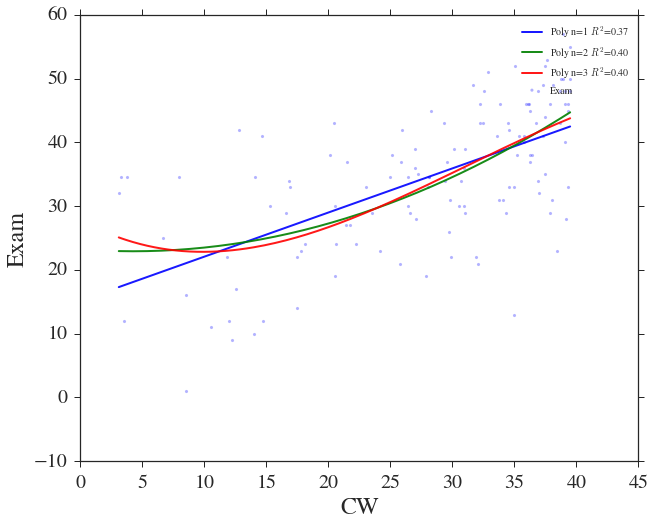

In [51]:
plt.scatter( grades_no_NaN.CW, grades_no_NaN.Exam, s=10, alpha=0.3)
plt.xlabel('CW')
plt.ylabel('Exam')

# points linearlyd space on lstats
x = pd.DataFrame({'CW': np.linspace(grades_no_NaN.CW.min(), grades_no_NaN.CW.max(), len(grades_no_NaN.CW)) })

# 1-st order polynomial
poly_1 = smf.ols(formula='Exam ~ 1 + CW', data=grades_no_NaN).fit()
plt.plot(x, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared,  alpha=0.9)

# 2-nd order polynomial
poly_2 = smf.ols(formula='Exam ~ 1 + CW + I(CW ** 2.0)', data=grades_no_NaN).fit()
plt.plot(x, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % poly_2.rsquared, alpha=0.9)

# 3-rd order polynomial
poly_3 = smf.ols(formula='Exam ~ 1 + CW + I(CW ** 2.0) + I(CW ** 3.0)', data=grades_no_NaN).fit()
plt.plot(x, poly_3.predict(x), 'r-', alpha=0.9,
         label='Poly n=3 $R^2$=%.2f' % poly_3.rsquared)

plt.legend()
#poly_1.mse_resid


**Exercise:** Describe the goodness-of-fit for each of the generated models. Which is better? Why?

**Exercise:** For each of the above three generated models, write code that predicts exam scores for students who score [4, 25, 40,100] in their course work:

**Exercise:** Attempt to create a polynomial model that better fits the data:

## Multiple linear regression

The above were examples of linear and polynomial regression models. One feature (predictor variable) and one prediction output (response variable). Below is an example of multiple linear regression. Several different features and one prediction output value.

In [52]:
multi_linear = smf.ols(formula='Exam ~ 1 + A1 + A2 + A3', data=grades_no_NaN).fit()
print multi_linear.params[0:4]
print 'R-Squared: ', multi_linear.rsquared
multi_linear.summary()

Intercept    5.425709
A1           0.520149
A2           2.490116
A3           2.816537
dtype: float64
R-Squared:  0.344016601265


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Exam   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     21.68
Date:                Wed, 10 Aug 2016   Prob (F-statistic):           2.36e-11
Time:                        16:35:34   Log-Likelihood:                -463.18
No. Observations:                 128   AIC:                             934.4
Df Residuals:                     124   BIC:                             945.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      5.4257      5.379      1.009      0.315        -5.222    16.073
A1             0.5201      1.274      0.408      0.684        -2.002     3.043
A2             2.4901      1.170      2.129      0.035         0.175     4.805
A3             2.8165      0.491      5.737      0.000         1.845     3.788
==============================================================================
Omnibus:                       11.682   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.330
Skew:                          -0.653   Prob(JB):                      0.00210
Kurtosis:                       3.780   Cond. No.                         57.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Exercise:** For the above generated model, write code that predicts exam scores for a student who scores 4,5,8 in their first 3 assignments:


**Exercise:** Experiment with a different combination of variables in order to generate a multiple linear regression model that better fits the data:

In [53]:
%%javascript
require(['base/js/utils'],
function(utils) {
   utils.load_extensions('calico-spell-check', 'calico-document-tools', 'calico-cell-tools');
});


<IPython.core.display.Javascript object>